<a href="https://colab.research.google.com/github/VinothiniRamsingh/Predicting_Heart_Disease/blob/main/int_hd_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Heart Disease**

Tasks To Be Performed:

1. Data Analysis:
a. Import the dataset
b. Get information about the dataset (mean, max, min, quartiles etc.)
c. Find the correlation between all fields

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
#Get basic statistics for each numeric column
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Find the correlation between all fields
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


2. Data Visualization:
a. Visualize the number of patients having a heart disease and not having
a heart disease
b. Visualize the age and whether a patient has disease or not
c. Visualize correlation between all features using a heat map

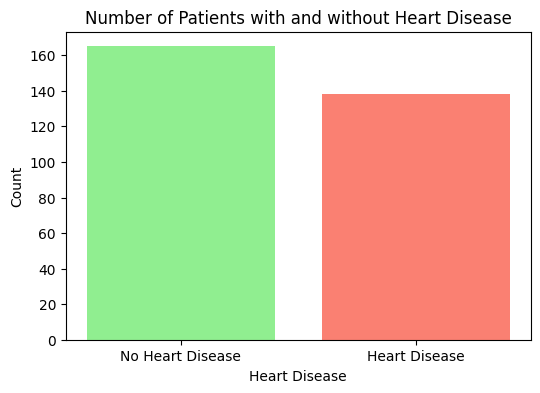

In [10]:
import matplotlib.pyplot as plt

#Visualize number of patients with and without heart disease using bar plot
heart_disease_counts = df['target'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(['No Heart Disease', 'Heart Disease'], heart_disease_counts, color=['lightgreen', 'salmon'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Number of Patients with and without Heart Disease')
plt.show()

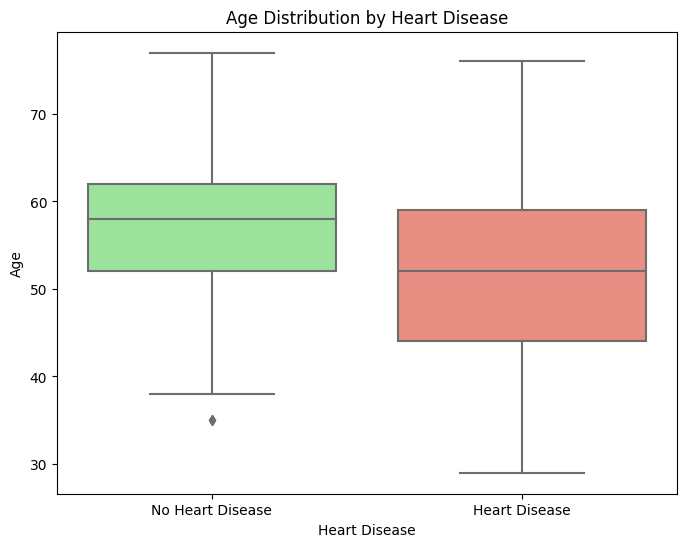

In [7]:
import seaborn as sns

#Visualize age distribution by target (disease or not)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df, palette=['lightgreen', 'salmon'])
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.title('Age Distribution by Heart Disease')
plt.show()

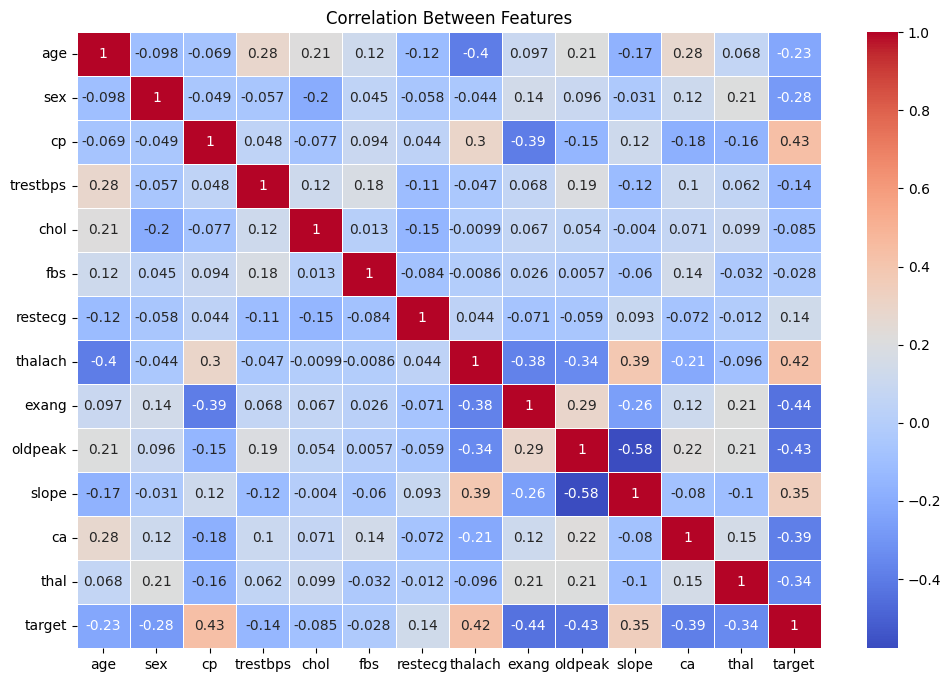

In [8]:
# Creating heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Features')
plt.show()

Select the best model
a. Print the confusion matrix of all classifiers
b. Print the classification report of all classifiers
c. Calculate Recall Precision and F1 score of all the models
d. Visualize confusion matrix using heatmaps
e. Select the best model based on the best accuracies

3. Logistic Regression:
a. Build a simple logistic regression model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and get the accuracy score

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [13]:
# Define the features (X) and the target variable (y)
X = df.drop('target', axis=1)
y = df['target']

In [14]:
# Split the data into a 70:30 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Create and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

In [21]:
# Calculate the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy1 = accuracy_score(y_test, y_pred)*100

#Calculate classification report
cr1 = classification_report(y_test, y_pred)

# Display the confusion matrix and accuracy score
print("Confusion Matrix:\n")
print(cm1)

Confusion Matrix:

[[32  9]
 [ 8 42]]


In [22]:
print("Accuracy Score:\n", accuracy1)

Accuracy Score:
 81.31868131868131


In [23]:
print("Classification report:\n",cr1)

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



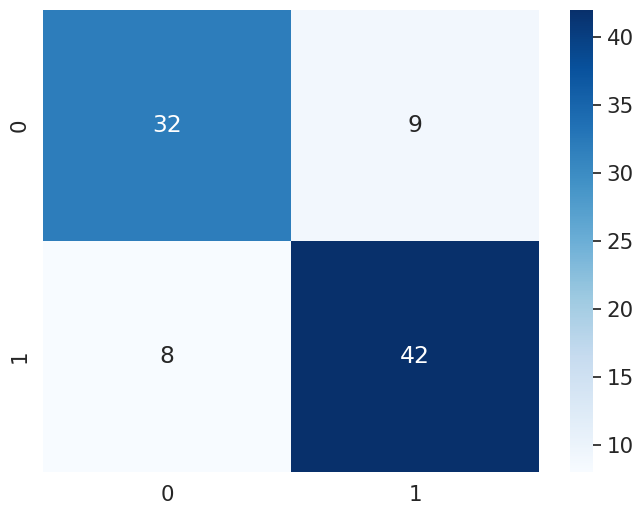

In [24]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g')
plt.show()

4. Decision Tree:
a. Build a decision tree model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the decision tree using the Graphviz package

In [25]:
!pip install scikit-learn graphviz

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [28]:
# Create and train the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy2 = accuracy_score(y_test, y_pred)*100

# Display the confusion matrix and accuracy score
print("Confusion Matrix:")
print(cm2)

Confusion Matrix:
[[32  9]
 [15 35]]


In [33]:
print("\nAccuracy Score:", accuracy2)


Accuracy Score: 73.62637362637363


In [34]:
#Calculate classification report
cr2 = classification_report(y_test, y_pred)
print("Classification report:\n",cr2)

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



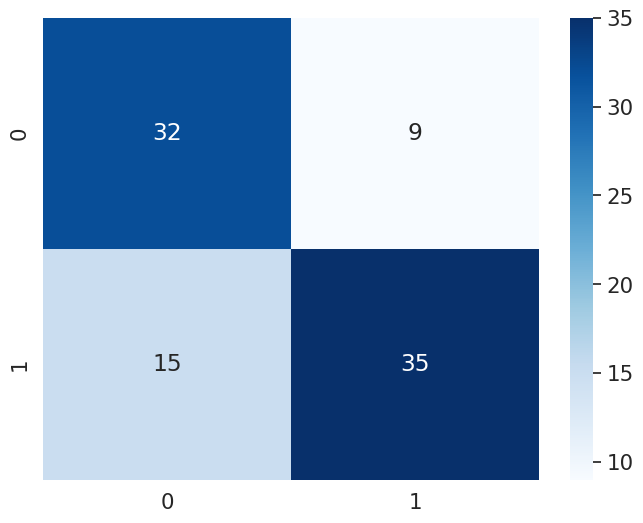

In [35]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g')
plt.show()

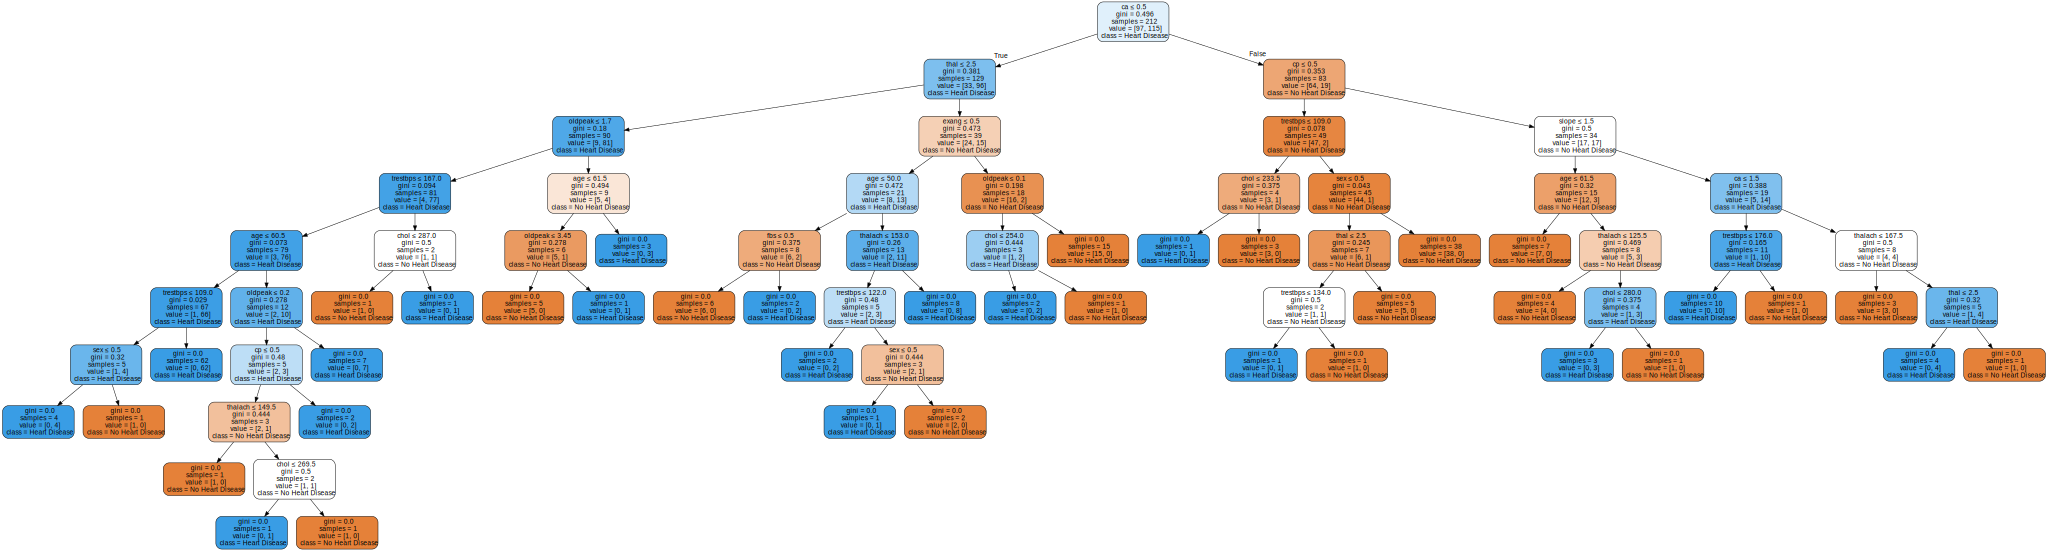

In [37]:
# Visualize the decision tree using Graphviz
dot_data = export_graphviz(decision_tree, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Heart Disease', 'Heart Disease'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

5. Random Forest:
a. Build a Random Forest model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the model using the Graphviz package

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy3 = accuracy_score(y_test, y_pred)*100

#Calculate classification report
cr3 = classification_report(y_test, y_pred)

# Display the confusion matrix and accuracy score
print("Confusion Matrix:")
print(cm3)

Confusion Matrix:
[[33  8]
 [ 8 42]]


In [41]:
#Print accuracy
print("\nAccuracy Score:", accuracy3)


Accuracy Score: 82.41758241758241


In [42]:
#Print classification report
print("Classification report:\n",cr3)

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



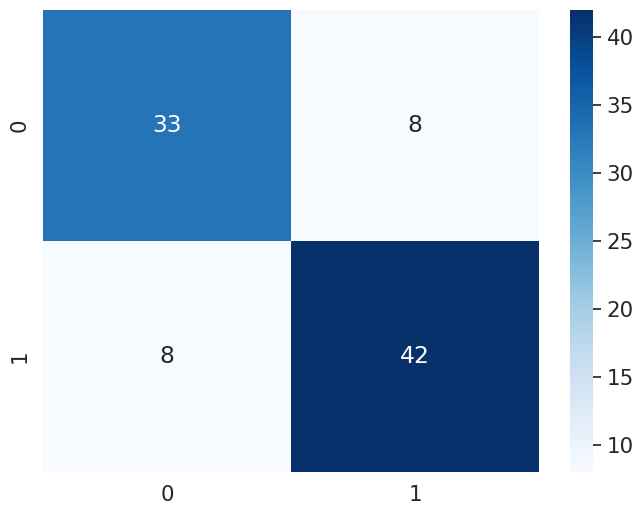

In [43]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g')
plt.show()

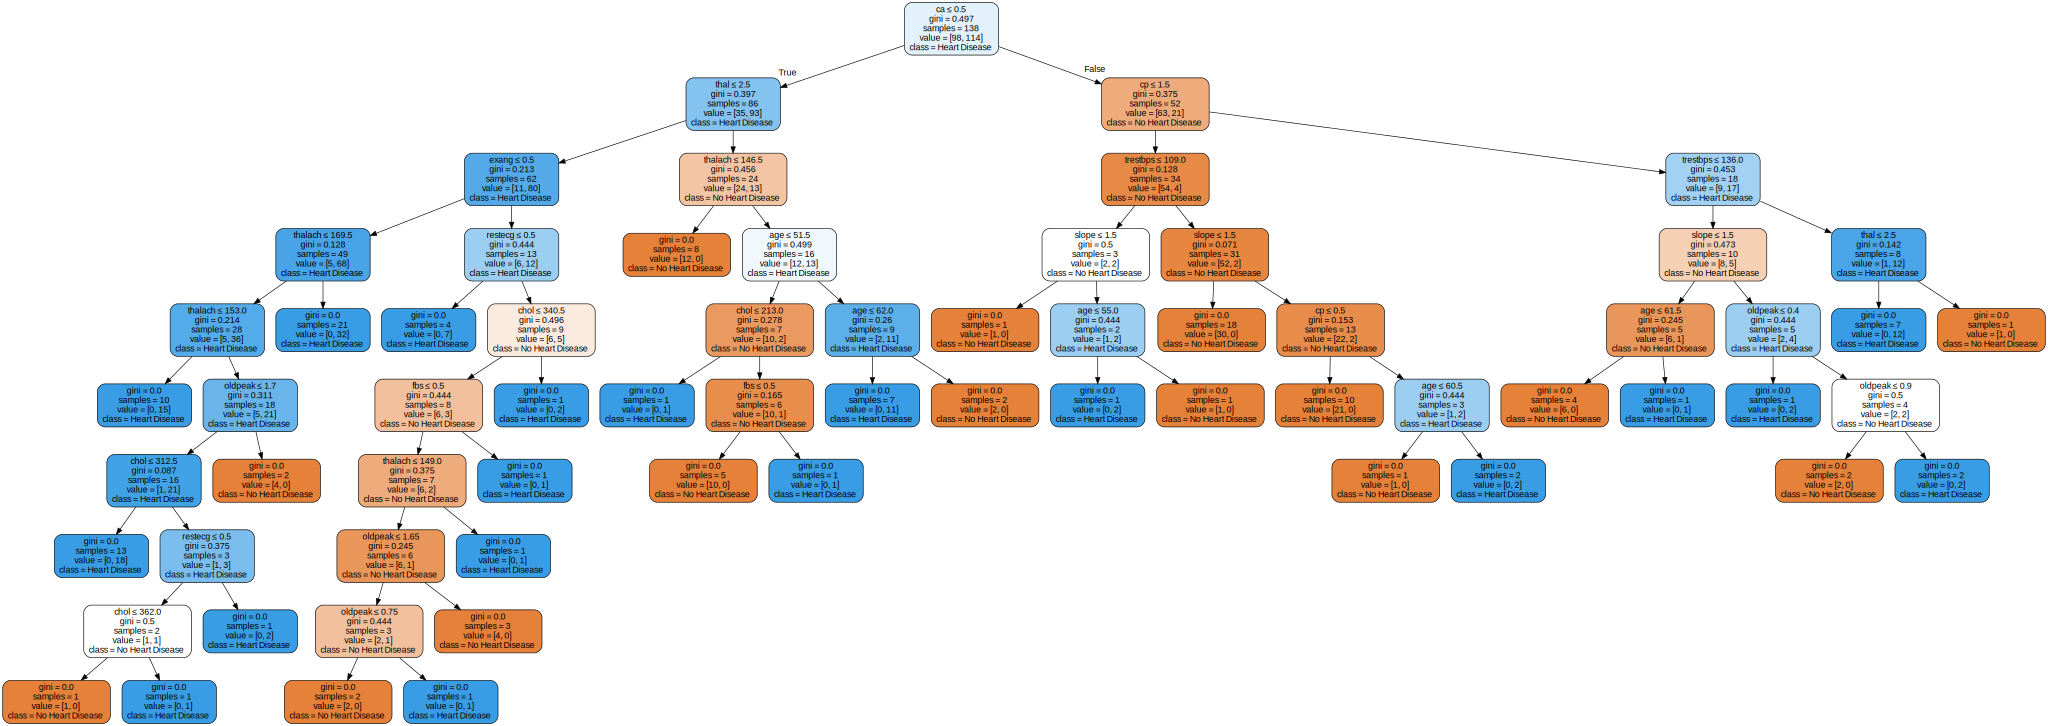

In [44]:
# Visualize Random Forest using Graphviz
tree_to_visualize = random_forest.estimators_[0]
dot_data = export_graphviz(tree_to_visualize, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Heart Disease', 'Heart Disease'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

display(graph)

Select the best model based on the best accuracies

In [45]:
print("Logistic Regression model Accuracy : ", accuracy1)
print("\nDecision Tree model Accuracy : ", accuracy2)
print("\nRandom Forest model Accuracy : ", accuracy3)

Logistic Regression model Accuracy :  81.31868131868131

Decision Tree model Accuracy :  73.62637362637363

Random Forest model Accuracy :  82.41758241758241


Based on the accuracies Random Forest model is giving better performance